# Introduction to Data Visualization
Data visualization is the process of presenting data in a graphical format.  It's a crucial aspect of data science because it bridges the gap between technical analysis and decision-making, allowing complex information to be communicated effectively.  Visualizations make it easier to understand patterns, trends, and outliers than raw data alone.

We should use data visualization in order to:

* **Explore Data (Exploratory Data Analysis - EDA):** Gain initial insights, identify relationships, and formulate hypotheses.
* **Communicate Findings:** Present results clearly and persuasively to both technical and non-technical audiences.
* **Support Decision-Making:** Provide visual evidence to guide strategic choices.
* **Enhance Understanding:**  Transform complex data into an accessible and intuitive format.
* **Tell Story:** Convey information in a way stakeholders can easily understand.

### Important Considerations
* **Purpose**: What's the question you're trying to answer? What story does the data tell?
* **Audience**: To whom you are presenting?
* **Simplicity**: Aim for the *simplest* visualization that effectively conveys the information. Avoid unnecessary complexity.  "Pretty" isn't the goal; clarity is.

**Important:** Sometimes simple statistics (mean, etc.) are sufficient; visualizations are not *always* needed.

---

## Scatter Plots
Scatter plots allow us to visualize the relationship between *two* (usually continuous) numerical variables. Each point represents a pair of values (x, y).

We use scatter plots to:

* Identify correlations (_Do the variables tend to increase or decrease together?_).
* Detect clusters  (_Are there groups of data points that are similar to each other?_).
* Find outliers (_Are there any data points that are far away from the general trend?_).

### Key Features and Customizations for Scatter Plots
* **Trend Lines:** Adding a regression line (often a linear regression) can highlight the overall trend. The easiest way to do so is by using `sns.regplot`.
* **Transparency:** Making points semi-transparent (using the parameter `alpha`) helps visualize areas with many overlapping points.
* **Color:** `hue` parameter allows us to use color to represent a third, categorical variable.
* **Shape:** `style` parameter allows us to use different marker shapes to represent another categorical variable.
* **Size:** `size` parameter allows us to use the size of the points to represent a third, *numerical* variable (less common, can be harder to interpret).

**Important:** Using too many features with additional parameters might make the plot busy easily.

### Examples of Scatter Plots
Let's use the `tips` dataset (Total bill vs. Tip amount, with additional features like sex, smoker status, day, time, and party size) from the Seaborn library.

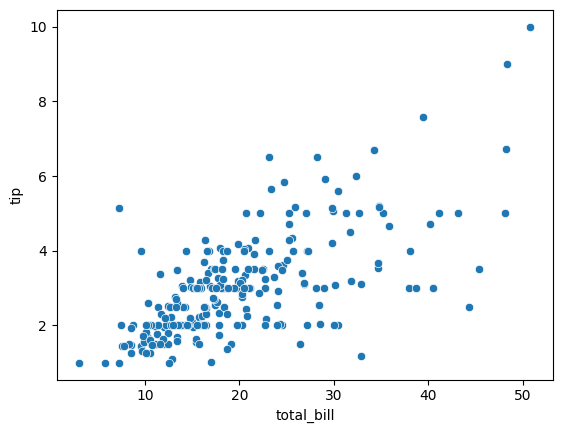

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")  # Load the built-in example dataset

# Basic scatter plot
sns.scatterplot(x="total_bill", y="tip", data=tips)
plt.show()

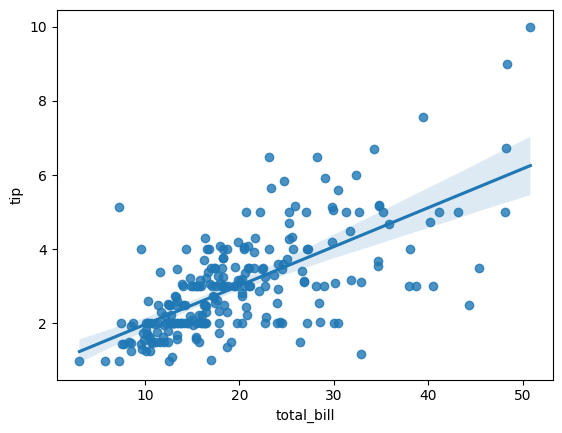

In [17]:
# Add a trend line (using seaborn's regplot for convenience)
sns.regplot(x="total_bill", y="tip", data=tips)
plt.show()

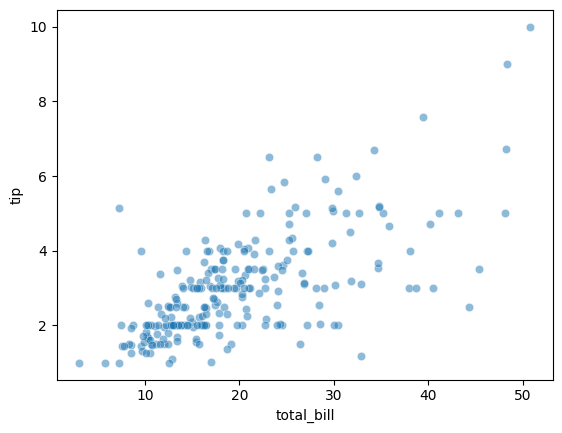

In [18]:
# Add transparency (alpha) to handle overplotting
sns.scatterplot(x="total_bill", y="tip", data=tips, alpha=0.5) #alpha is transparency
plt.show()

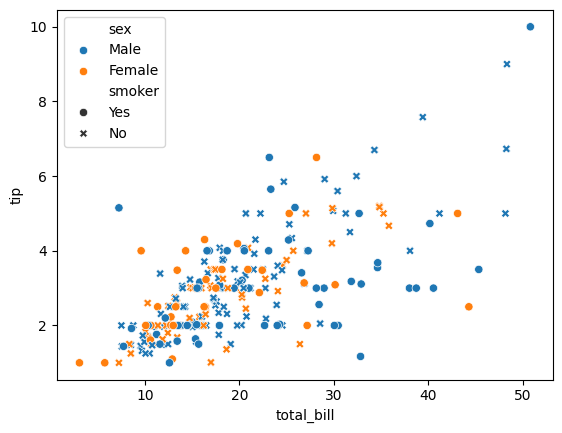

In [19]:
# Add more variables using color (hue) and shape (style)
sns.scatterplot(x="total_bill", y="tip", data=tips, hue="sex", style="smoker")
plt.show()

***

## Line Plots
Line plots allow us to visualize the relationship between two variables where there is a known, *continuous* relationship along the x-axis. They are most commonly used for time series data (showing how something changes over time).

We use line plots in order to:

* Track trends over time (_Stock prices, temperature changes, population growth, etc._).
* Show continuous processes (_Anything where the x-axis represents a continuous quantity, e.g., distance, speed, concentration_).

We should _not_ use line plots for:

* Unrelated data points where there's no inherent continuous relationship between them. (_The "tips" dataset example – connecting total bills of different parties is meaningless_). A trend line is different.
* Categorical x-axis (_usually_). (_If the x-axis represents distinct categories, e.g., countries, product types, a bar plot is usually more appropriate_).

### Key Features and Customizations for Line Plots
* **Multiple Lines:** `hue` parameter allows us to plot multiple lines on the same axes to compare different categories or groups.
* **Line Styles:** `linestyle` parameter allows us to change line styles (solid, dashed, dotted) to differentiate lines.
* **Markers:** `marker` parameter allows us to add markers to individual data points (_optional, can make the plot cluttered_).

### Examples of Line Plots

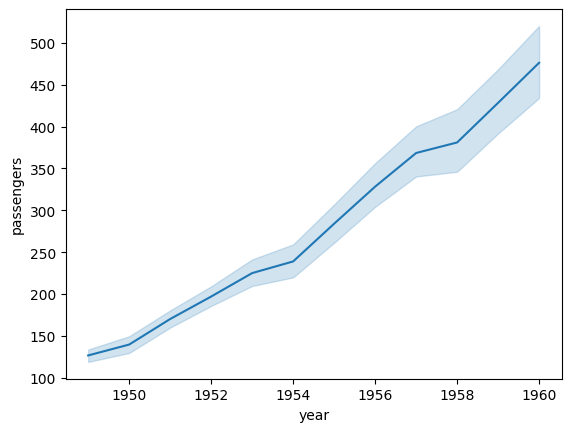

In [20]:
# Libraries already imported, just import the dataset
flights = sns.load_dataset("flights")

# Basic line plot (passengers over time)
sns.lineplot(x="year", y="passengers", data=flights)
plt.show()

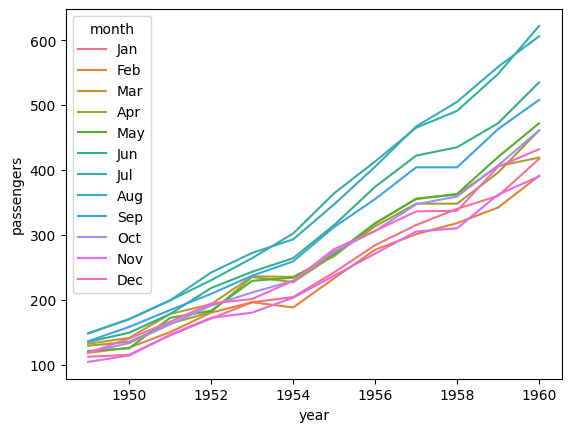

In [21]:
# Line plot with multiple lines (passengers per month, over time)
sns.lineplot(x="year", y="passengers", data=flights, hue="month")
plt.show()

---

## Distribution Plots (Histograms)
Histograms allow us to visualize the *distribution* of a *single, continuous* numerical variable. They show how frequently different values occur.

We use histograms in order to:

* Understand data spread (_Is the data tightly clustered or widely spread?_).
* Identify skewness (_Is the distribution symmetrical or skewed to one side?_).
* Detect multimodality (_Are there multiple peaks in the distribution, suggesting different subgroups?_).

In a histogram:

* **X-axis** represents the continuous numerical variable being analyzed.
* **Y-axis:** represents the frequency (count) or density of data points within each bin.

### Key Features and Customizations for Histograms
* **Bins:** The intervals into which the data is divided. The number of bins (`bins` parameter) can significantly affect the appearance of the histogram.
* **Kernel Density Estimation (KDE):**  A smoothed version of the histogram (`kde=True` parameter in seaborn), providing a continuous estimate of the probability density function.

_To explore the distribution for a categorical variable, use box plots_.

### Examples of Histograms

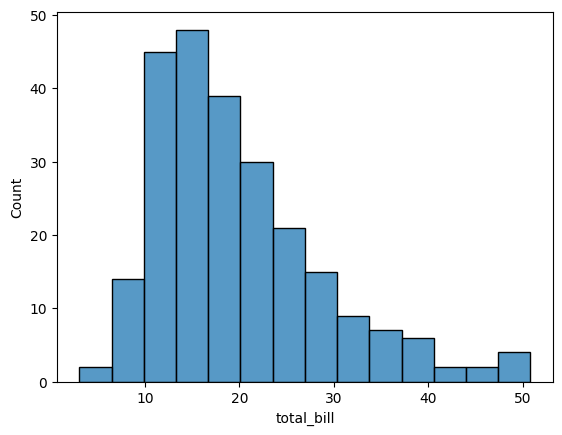

In [22]:
# Libraries already imported, just import the dataset
tips = sns.load_dataset("tips")

# Basic histogram
sns.histplot(x="total_bill", data=tips)
plt.show()

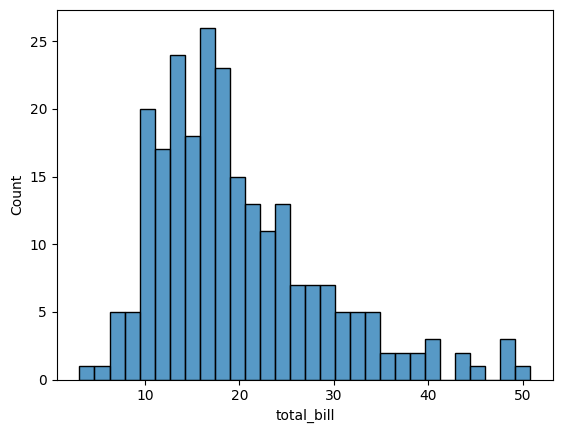

In [23]:
# Change the number of bins
sns.histplot(x="total_bill", data=tips, bins=30)  # More bins = more detail
plt.show()

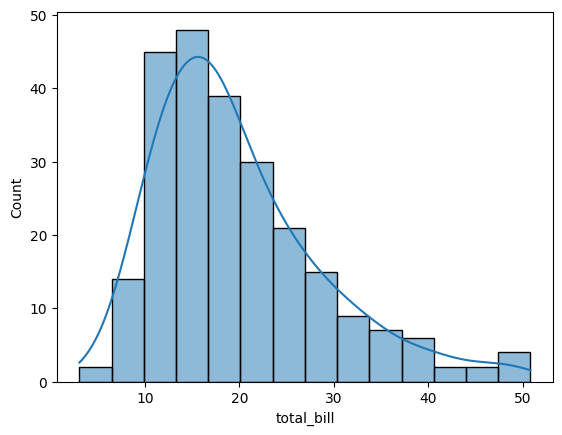

In [24]:
# Add a Kernel Density Estimate (KDE)
sns.histplot(x="total_bill", data=tips, kde=True) # Smooth curve
plt.show()

---

## Categorical Plots (Bar Plots)
Bar plots allow us to visualize the relationship between a *categorical* variable (x-axis) and a *numerical* variable (y-axis). They are often used to compare a statistic (e.g., mean, count, sum) across different categories.

We use bar plots in order to:

* Compare group means (_e.g., average income by education level_).
* Show counts (_Number of observations in each category_).
* Display proportions (_Percentage of respondents choosing each option in a survey_).

**Bar plots** have categorical x-axis, numerical y-axis, while **histogram** have continuous numerical x-axis, frequency/count y-axis.

### Key Features and Customizations for Categorical Plots
* **Grouped or Stack Bars:** We can use `hue` parameter to add a second categorical variable to create grouped or stacked bars.
* **Changing the Statistics for Y-Axis:** We can change the statistic displayed on the y-axis (e.g., `estimator=sum` to show the sum instead of the mean). This often requires preprocessing the data with Pandas (as shown in the last example below).
* **Confidence Intervals:** Seaborn automatically displays confidence intervals around the bars (can be turned off).
* **Orientation:** We can use horizontal or vertical bars.

### Examples of Bar Plots

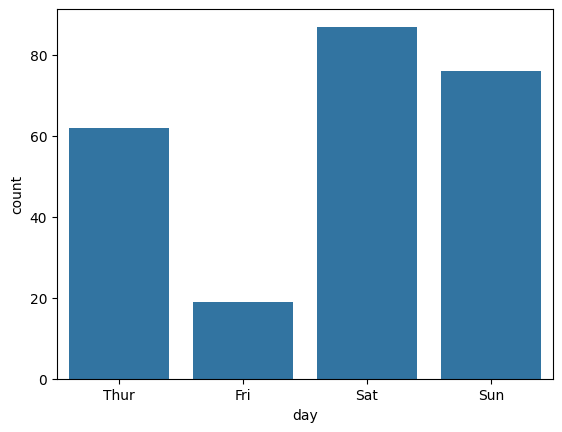

In [25]:
import pandas as pd

# Other libraries already imported, just import the dataset
tips = sns.load_dataset("tips")

# Basic bar plot (count of observations per day)
sns.countplot(x="day", data=tips)
plt.show()

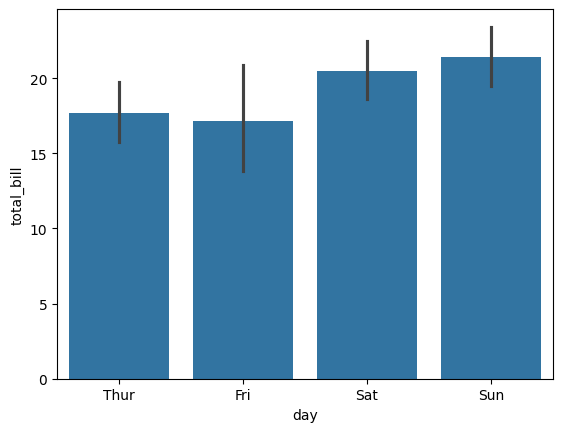

In [26]:
# Bar plot of total bill, grouped by day
sns.barplot(x="day", y="total_bill", data=tips) #Default is mean
plt.show()

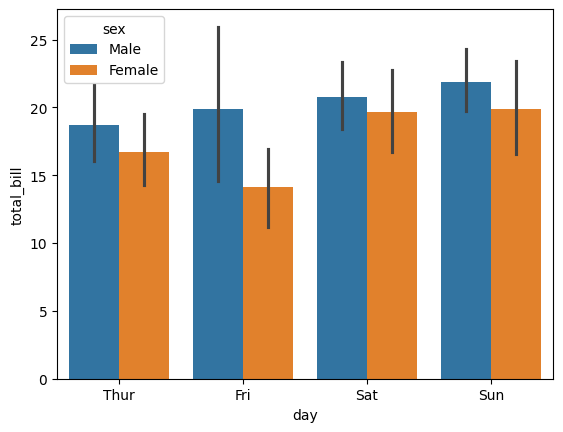

In [27]:
# Bar plot with multiple categories (hue)
sns.barplot(x="day", y="total_bill", data=tips, hue="sex")
plt.show()

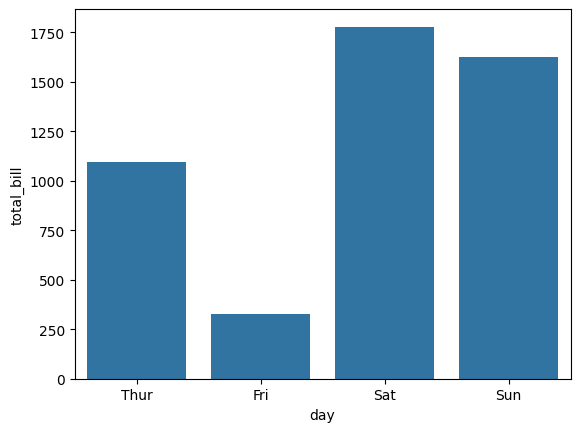

In [28]:
# Calculate the sum of total_bill per day (using pandas)
total_bill_per_day = tips.groupby('day', observed=False)['total_bill'].sum().reset_index()

# Bar plot with pre-calculated sums
sns.barplot(x='day', y='total_bill', data=total_bill_per_day)
plt.show()

---

## Box Plots
Box plots (also known as box-and-whisker plots) are a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. 

Box plots are particularly useful for:
* Comparing distributions (_Quickly comparing the central tendency, spread, and skewness of multiple datasets_).
* Identifying outliers (_Points that fall outside the "whiskers" are often considered outliers_).
* Visualizing data spread (_Showing the Interquartile Range and the overall range of the data_).

### Key Features and Interpretations of Box Plots
* **Box:** Represents the interquartile range (IQR), which contains the middle 50% of the data.  The bottom of the box is Q1 (25th percentile), and the top is Q3 (75th percentile).
* **Median Line:**  A line within the box that indicates the median (Q2, 50th percentile).
* **Whiskers:** Lines extending from the box.  By default in most libraries (including Seaborn), these extend to the furthest data point within 1.5 * IQR from the box edges (Q1 and Q3).  This is the *most important* customization point, and the default is *not* always appropriate (see below).
* **Outliers:**  Individual points plotted beyond the whiskers. These points are considered statistically unusual, given the IQR.
* **Notch**: It displays a confidence interval around the median which is normally based on the median +/- 1.57 x IQR/sqrt(n).

### Customizations
We can customize many things. Some of them are:
* `showcaps`: Show the caps on the ends of whiskers.
* `showbox`: Show the central box.
* `showmeans`: Show the arithmetic means.
* `showfliers`: Show the outliers beyond the caps.

### Important Considerations for Whiskers
The "1.5 * IQR" rule for whisker length is a common convention, *but it's not a universal rule*.  It's crucial to understand that:

* **Different Definitions Exist:** Some software uses different definitions for the whiskers (e.g., minimum and maximum values, specific percentiles).  *Always check the documentation*.
* **Context Matters:**  Whether a point is truly an "outlier" depends on the context of your data.  The 1.5 * IQR rule is a guideline, not a definitive test.
* **Non-Normal Data:** The 1.5 * IQR rule is based on the assumption of a *normal distribution*.  For highly skewed data, it might flag too many (or too few) points as outliers.  Consider using other methods (e.g., percentiles) for such data.
* **Vertical or Horizontal:** You can change the orientation.

### Examples of Box Plots

tips = sns.load_dataset("tips")

# Basic box plot (distribution of total_bill)
sns.boxplot(x=tips["total_bill"])
plt.show()